In [1]:
# Data preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [3]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [4]:
# Building the RNN

# Importing the requied modules
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initializing the RNN
regressor = Sequential()

Using TensorFlow backend.


In [5]:
# Adding the LSTM layer with dropout regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [6]:
# Adding other LSTM layers
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [7]:
# Adding the output layer
regressor.add(Dense(units=1))

In [8]:
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [9]:
# Building the RNN
regressor.fit(X_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0603
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 8s 7ms/step - 

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015


In [10]:
# Part 3: Making the predictions and visualizing the result
# Getting the real stock price
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_train.iloc[:,1:2].values

In [11]:
# Get the predicted prices of next 20 days
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

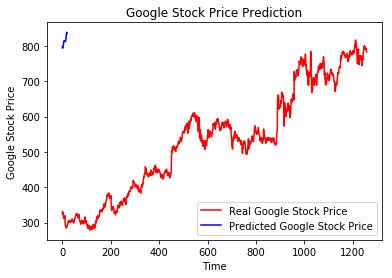

In [12]:
# Visualizing the results
plt.plot(real_stock_price, color='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# Parameter tuning
# To implement grid search